In [6]:
import os
print(os.getcwd())
import pandas as pd
import numpy as np
import json as json
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

d:\Personal Projects\Social_Ecological_Info_Cooperation\Code\My_Simulations


In [15]:
from helper_functions import strategy_to_label
from helper_functions import all_information_modes

In [3]:
WSLS = [1,0,0,1]
GT = [1,0,0,0]
ALLC = [1,1,1,1]
TFT = [1,0,1,0]
ALLD = [0,0,0,0]
ReverseGT = [0,0,0,1]

strategy_to_label(np.array([0,0,0,0]))

TypeError: strategy_to_label() missing 1 required positional argument: 'mode'

In [32]:
df = pd.read_csv("../Data/Local_Stability_Analysis/stable_policies_local_stability_analysis.csv")

def parse_and_label_locally_stable_strategies(df):


    df["policy"] = df["policy"].apply(lambda x: np.array(json.loads(x)))
    df = df.explode("policy", ignore_index=True)


    df[["strategy_agent_1", "strategy_agent_2"]] = pd.DataFrame([[p[0], p[1]] for p in df["policy"]])


    df["strategy_agent_1_label"] = df.apply(lambda row: strategy_to_label(row["strategy_agent_1"], mode = row["mode"]), axis=1)
    df["strategy"] = df["strategy_agent_1_label"]

    df.drop(columns=["strategy_agent_1", "strategy_agent_2", "policy", "strategy_agent_1_label"], inplace=True)

    return df

print(parse_and_label_locally_stable_strategies(df))




# print(df)
# Convert 'policy' column from string to np.array

# print(strategy)
# strategy_to_label(strategy, mode = 'ecological')


         mode  discount_factor  m_value strategy
0  ecological            0.995     -4.0    ALL C
1  ecological            0.995     -4.0    ALL D
2        none            0.995     -6.0    ALL D
3        none            0.995     -6.5    ALL D
4  ecological            0.955     -6.5    ALL D
5  ecological            0.995     -6.5    ALL C
6        none            0.955     -6.5    ALL D
7    complete            0.995     -6.5    ALL C
8    complete            0.995     -6.5     WSLS
9    complete            0.995     -6.5  Inv. GT


In [33]:
df = pd.read_csv("../Data/Local_Stability_Analysis/stable_policies_local_stability_analysis.csv")
df_parsed = parse_and_label_locally_stable_strategies(df)

In [74]:
def plot_locally_stable_strategies(df, m_values_to_plot, discount_factors_to_plot):

    df_for_plotting = df[(df["m_value"].isin(m_values_to_plot)) & (df["discount_factor"].isin(discount_factors_to_plot))].copy()

    desired_order = [ "ALL D",  "Inv. GT",  "WSLS","ALL C",]  

    strategies_to_plot = [s for s in desired_order if s in df_for_plotting["strategy"].unique()]
    
    y_index = {s:i for i,s in enumerate(strategies_to_plot)}

    y_jitter = {'complete': 0.25, 'ecological': 0.08,
                'social': -0.08, 'none': -0.25}

    df_for_plotting["y"] = df_for_plotting["strategy"].map(y_index)
    df_for_plotting["y_jit"] = df_for_plotting["y"] + df_for_plotting["mode"].map(y_jitter)

   
    sns.set_theme(context="talk", style="whitegrid")
    plt.rcParams.update({
        "axes.facecolor": "white",
        "figure.facecolor": "white",
        "axes.edgecolor":  "black",
        "grid.color":      "#d0d0d0",
        "grid.linestyle":  "--",
        "grid.linewidth":  0.6,
        "xtick.color":     "black",
        "ytick.color":     "black",
        "text.color":      "black",
        "axes.labelcolor": "black",
    })

    fig, ax = plt.subplots(figsize=(9, 5))

    # Strategy edge colors
    strategy_colors = {
        "ALL D": "#d62728", 
        "ALL C": "#2ca02c",  
        "WSLS": "#2ca02c",   # slightly darker green
        "Inv. GT": "#8b3e4c"
    }

    # Marker shapes for info conditions
    marker_map = {
        "social": "^", 
        "ecological": "s", 
        "complete": "o", 
        "none": "X"
    }

    # --------------------------
    # 4. Scatterplot
    # --------------------------
    for mode in all_information_modes:
        sub = df_for_plotting[df_for_plotting["mode"] == mode]
        if sub.empty:
            continue
        sns.scatterplot(
            data=sub, x="discount_factor", y="y_jit",
            marker=marker_map[mode], s=150, linewidth=1.8,
            facecolors="none",
            edgecolor=sub["strategy"].map(strategy_colors),
            ax=ax, legend=False
        )

    # --------------------------
    # 5. Legend (outside)
    # --------------------------
    shape_handles = [
        Line2D([0],[0], marker=marker_map[i], linestyle="None",
            markerfacecolor="none", markeredgecolor="black",
            markersize=9, label=i)
        for i in all_information_modes
    ]

    ax.legend(
        handles=shape_handles,
        title="Information condition",
        loc="center left",
        bbox_to_anchor=(1.02, 0.5),
        frameon=True, facecolor="white", edgecolor="black"
    )

    # --------------------------
    # 6. Axis formatting
    # --------------------------
    ax.set_xlabel("Discount factor")
    ax.set_ylabel("Strategy")

    # Force ticks at your discount factor values
    ax.set_xticks(discount_factors_to_plot)
    ax.set_xticklabels([f"{d:.3f}" for d in discount_factors_to_plot])

    ax.set_yticks(range(len(strategies_to_plot)))
    ax.set_yticklabels(strategies_to_plot)

    # Gridlines along x
    ax.yaxis.grid(True)
    ax.xaxis.grid(True)
    # ax.xaxis.grid(True, linestyle="--", alpha=0.7, color="#aaaaaa")
    midpoints = [(discount_factors_to_plot[i] + discount_factors_to_plot[i+1]) / 2
                for i in range(len(discount_factors_to_plot)-1)]

    # for xpos in midpoints:
    #     ax.axvline(
    #         x=xpos, linestyle="-", color="#aaaaaa",
    #         linewidth=0.8, alpha=1
    #     )


    sns.despine()
    plt.tight_layout()
    plt.show()

In [72]:
local_stability_data_full = pd.read_csv("../Data/Local_Stability_Analysis/stable_policies_local_stability_analysis.csv")
df_parsed = parse_and_label_locally_stable_strategies(local_stability_data_full)

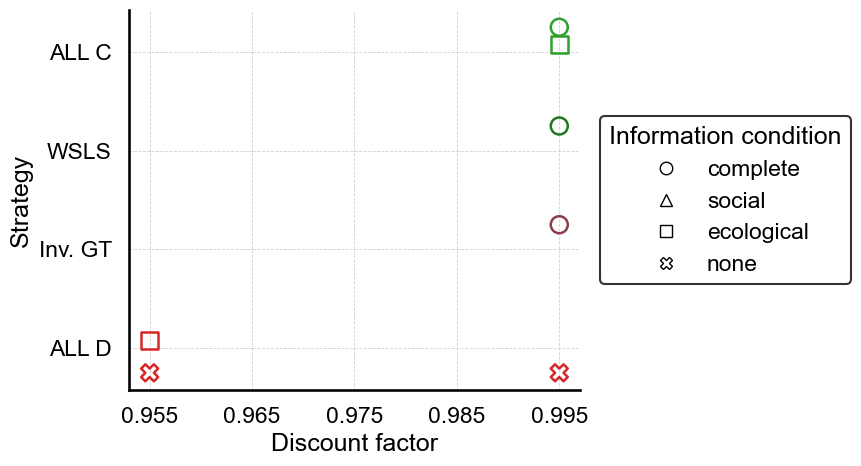

In [73]:
discount_factors = [0.955, 0.965, 0.975, 0.985, 0.995]
strategies = ['ALLD', 'Inv. GT', 'WSLS', 'ALLC']
m_values_to_plot = [-6.5]


# rows = []
# for s in strategies:
#     for d in discount_factors:
#         for info in info_conditions:
#             base_p = 0.35 + 0.35*(d > 0.95)
#             p = base_p if s != "Exploit" else 0.25
#             rows.append({
#                 "discount_factor": d,
#                 "strategy": s,
#                 "info": info,
#                 "stable": rng.random() < p
#             })


plot_locally_stable_strategies(df_parsed, m_values_to_plot, discount_factors)

    discount_factor strategy             info  stable  y  y_jit
0             0.955     ALLD      Only Social    True  0  -0.08
3             0.955     ALLD          No Info    True  0  -0.25
4             0.965     ALLD      Only Social    True  0  -0.08
6             0.965     ALLD         Complete    True  0   0.25
9             0.975     ALLD  Only Ecological    True  0   0.08
10            0.975     ALLD         Complete    True  0   0.25
11            0.975     ALLD          No Info    True  0  -0.25
12            0.985     ALLD      Only Social    True  0  -0.08
13            0.985     ALLD  Only Ecological    True  0   0.08
14            0.985     ALLD         Complete    True  0   0.25
15            0.985     ALLD          No Info    True  0  -0.25
18            0.995     ALLD         Complete    True  0   0.25
20            0.955  Inv. GT      Only Social    True  1   0.92
21            0.955  Inv. GT  Only Ecological    True  1   1.08
22            0.955  Inv. GT         Com

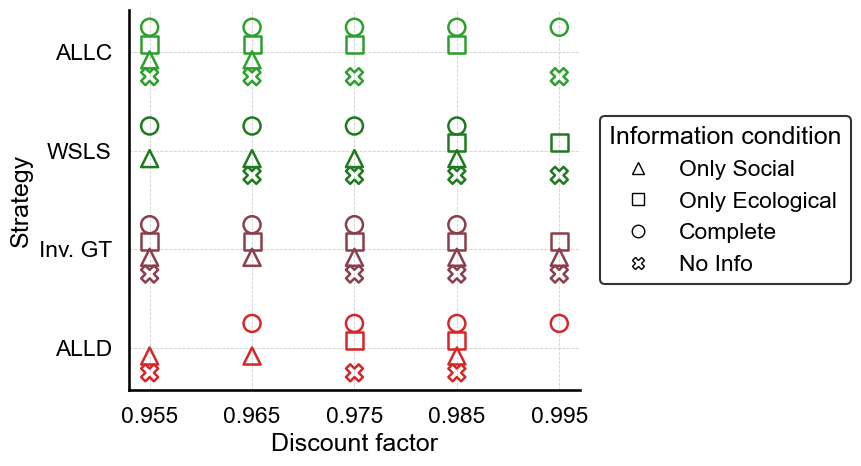

In [ ]:
import numpy as np
import pandas as pd


# --------------------------
# 2. Jittered y positions
# --------------------------
y_index = {s:i for i,s in enumerate(strategies)}
y_jitter = {'Complete': 0.25, 'Only Ecological': 0.08,
            'Only Social': -0.08, 'No Info': -0.25}

df_stable["y"] = df_stable["strategy"].map(y_index)
df_stable["y_jit"] = df_stable["y"] + df_stable["info"].map(y_jitter)

print(df_stable)

# --------------------------
# 3. Thesis-ready style
# --------------------------
sns.set_theme(context="talk", style="whitegrid")
plt.rcParams.update({
    "axes.facecolor": "white",
    "figure.facecolor": "white",
    "axes.edgecolor":  "black",
    "grid.color":      "#d0d0d0",
    "grid.linestyle":  "--",
    "grid.linewidth":  0.6,
    "xtick.color":     "black",
    "ytick.color":     "black",
    "text.color":      "black",
    "axes.labelcolor": "black",
})

fig, ax = plt.subplots(figsize=(9, 5))

# Strategy edge colors
strategy_colors = {
    "ALL D": "#d62728", 
    "ALLC": "#2ca02c",  
    "WSLS": "#1f7a1f",   # slightly darker green
    "Inv. GT": "#8b3e4c"
}

# Marker shapes for info conditions
marker_map = {
    "Only Social": "^", 
    "Only Ecological": "s", 
    "Complete": "o", 
    "No Info": "X"
}

# --------------------------
# 4. Scatterplot
# --------------------------
for info in info_conditions:
    sub = df_stable[df_stable["info"] == info]
    if sub.empty:
        continue
    sns.scatterplot(
        data=sub, x="discount_factor", y="y_jit",
        marker=marker_map[info], s=150, linewidth=1.8,
        facecolors="none",
        edgecolor=sub["strategy"].map(strategy_colors),
        ax=ax, legend=False
    )

# --------------------------
# 5. Legend (outside)
# --------------------------
shape_handles = [
    Line2D([0],[0], marker=marker_map[i], linestyle="None",
           markerfacecolor="none", markeredgecolor="black",
           markersize=9, label=i)
    for i in info_conditions
]

ax.legend(
    handles=shape_handles,
    title="Information condition",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    frameon=True, facecolor="white", edgecolor="black"
)

# --------------------------
# 6. Axis formatting
# --------------------------
ax.set_xlabel("Discount factor")
ax.set_ylabel("Strategy")

# Force ticks at your discount factor values
ax.set_xticks(discount_factors)
ax.set_xticklabels([f"{d:.3f}" for d in discount_factors])

ax.set_yticks(range(len(strategies)))
ax.set_yticklabels(strategies)

# Gridlines along x
ax.yaxis.grid(True)
ax.xaxis.grid(True)
# ax.xaxis.grid(True, linestyle="--", alpha=0.7, color="#aaaaaa")
midpoints = [(discount_factors[i] + discount_factors[i+1]) / 2
             for i in range(len(discount_factors)-1)]

# for xpos in midpoints:
#     ax.axvline(
#         x=xpos, linestyle="-", color="#aaaaaa",
#         linewidth=0.8, alpha=1
#     )


sns.despine()
plt.tight_layout()
plt.show()


In [75]:
import numpy as np
import pandas as pd

discount_factors = [0.955, 0.965, 0.975, 0.985, 0.995]
strategies = ['ALLC', 'WSLS', 'Inv. GT', 'ALLD']

rng = np.random.default_rng(42)

rows = []
for d in discount_factors:
    for s in strategies:
        abundance = rng.integers(5, 40)   # random counts between 5–40
        rows.append({"discount_factor": d, "strategy": s, "abundance": abundance})

df = pd.DataFrame(rows)

pivot = (df.pivot_table(
            index="discount_factor",
            columns="strategy",
            values="abundance",
            aggfunc="sum")
         .reindex(columns=strategies)   # keep order
         .fillna(0))




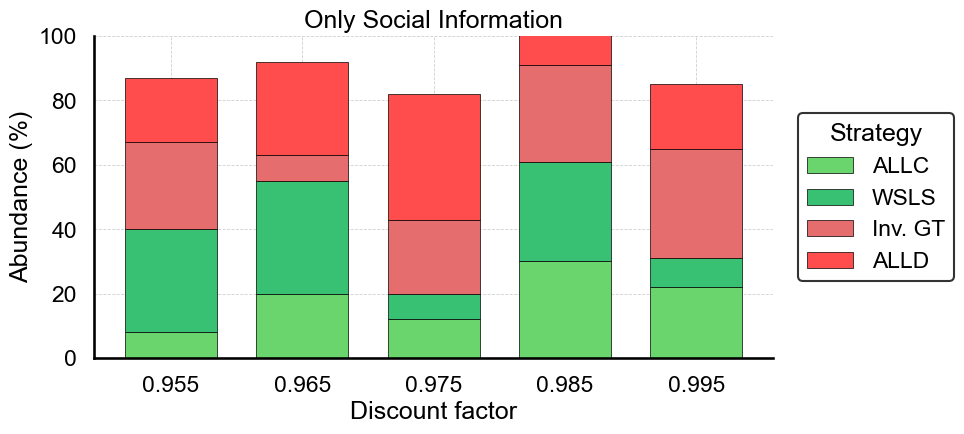

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------
# 1. Generate random dataset
# --------------------------
discount_factors = [0.955, 0.965, 0.975, 0.985, 0.995]
strategies = ['ALLC', 'WSLS', 'Inv. GT', 'ALLD']

rng = np.random.default_rng(42)
rows = []
for d in discount_factors:
    for s in strategies:
        abundance = rng.integers(5, 40)
        rows.append({"discount_factor": d, "strategy": s, "abundance": abundance})
df = pd.DataFrame(rows)

pivot = (df.pivot_table(index="discount_factor",
                        columns="strategy",
                        values="abundance",
                        aggfunc="sum")
           .reindex(columns=strategies)
           .fillna(0))

# --------------------------
# 2. Define palette
# --------------------------
strategy_colors_barplot = {
    'ALLC':   '#6ad46d',   # bright green
    'WSLS':   '#38c172',   # medium green
    'Inv. GT':'#e66d6d',   # warm red
    'ALLD':   '#ff4d4d',   # strong red
}

# --------------------------
# 3. Thesis-style plot
# --------------------------
sns.set_theme(context="talk", style="whitegrid")
plt.rcParams.update({
    "axes.facecolor": "white",
    "figure.facecolor": "white",
    "axes.edgecolor":  "black",
    "grid.color":      "#d0d0d0",
    "grid.linestyle":  "--",
    "grid.linewidth":  0.6,
    "xtick.color":     "black",
    "ytick.color":     "black",
    "text.color":      "black",
    "axes.labelcolor": "black",
})

fig, ax = plt.subplots(figsize=(10, 4.5))
x = np.arange(len(pivot.index))
bottom = np.zeros(len(pivot))
bar_width = 0.7

for s in strategies:
    ax.bar(
        x, pivot[s].values, bottom=bottom,
        label=s, color=strategy_colors_barplot[s],
        edgecolor="black", linewidth=0.5,
        width=bar_width
    )
    bottom += pivot[s].values

# X axis
ax.set_xticks(x)
ax.set_xticklabels([f"{d:.3f}" for d in pivot.index], rotation=0)
ax.set_xlabel("Discount factor")
ax.set_ylabel("Abundance (%)")

# Fix Y axis 0–100
ax.set_ylim(0, 100)
ax.set_yticks(np.arange(0, 101, 20))

# Legend outside (clean, white background)
leg = ax.legend(
    title="Strategy", loc="center left", bbox_to_anchor=(1.02, 0.5),
    frameon=True, facecolor="white", edgecolor="black"
)
leg.get_title().set_color("black")

sns.despine()   # remove top/right spines
plt.tight_layout()
plt.title("Only Social Information")
plt.show()
